# Feature Engineering
 - log-transform SalePrice
 - Transform skewed numeric features
 - encode categorical variables
 - export processed dataset

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler

# Load the cleaned data
df = pd.read_csv('../data/cleaned_train.csv')
print(f"Shape: {df.shape}")


Shape: (1458, 75)


## Log transform target variable
(Sale Price is right skewed, will apply np.log1p)

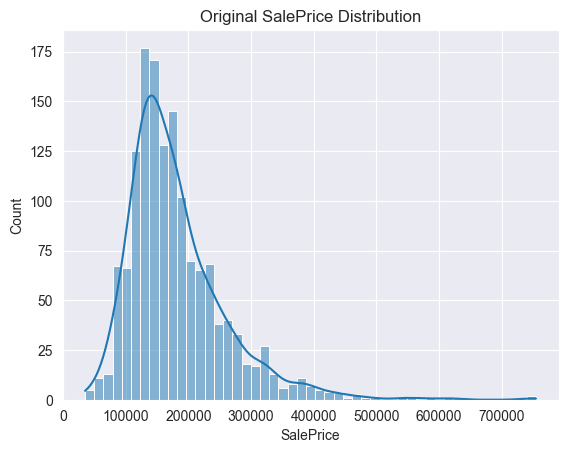

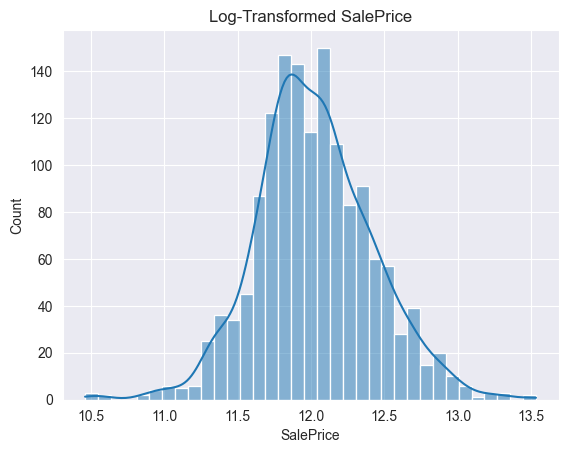

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['SalePrice'], kde=True)
plt.title("Original SalePrice Distribution")
plt.show()

df['SalePrice'] = np.log1p(df['SalePrice'])

sns.histplot(df['SalePrice'], kde=True)
plt.title("Log-Transformed SalePrice")
plt.show()


## Transform skewed Numeric Features

In [3]:
# Get numeric features
numeric_feats = df.select_dtypes(include=[np.number]).drop('SalePrice', axis=1)

# Compute skewness
skewed_feats = numeric_feats.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
high_skew = skewed_feats[skewed_feats > 0.75]

print(f"Features to log-transform: {len(high_skew)}")

# Log1p transform the skewed numeric features
for feature in high_skew.index:
    df[feature] = np.log1p(df[feature])


Features to log-transform: 20


## Encode Categorical variables (One-hot encoding)

In [4]:
df = pd.get_dummies(df, drop_first=True)
print(f"Shape after encoding: {df.shape}")


Shape after encoding: (1458, 230)


## Feature Scaling

In [5]:
#Use later if needed
# scaler = StandardScaler()
# df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


## Save Processed Data

In [6]:
df.to_csv('../data/processed_train.csv', index=False)
print("Saved to data/processed_train.csv")


Saved to data/processed_train.csv
